# Generate data

In [1]:
from piper import piper
from piper.defaults import *
from piper.verbs import *
from piper.dates import *
from piper.io import *
from piper.pandas import *

from fake.sku import *
from fake.customer import *
from fake.orders import *

piper version 0.0.9, last run: Tuesday, 09 March 2021 20:31:48


## customers

In [2]:
customers_to_generate = 300
%piper customers <- generate_customers(rows=customers_to_generate, seed=42)
head(customers)

300 rows, 12 columns


,customer_no,salutation,first_name,type,initial,surname,email,dob,status,street,area,pcode
0,49529297,Ms,Vickie,HomeCare,,Montoya,v.montoya@protonmail.com,1980-03-11,1,130b Wallis Grove Street,Blackpool,FY4 1RA
1,49529298,Mr,Ted,Hospital patient,,Noble,ted.noble@gmx.com,1948-12-01,1,149c Newgate Vale,Exeter,EX17 3LZ
2,49529299,Mr,Zachary,Hospital patient,E,Banks,zacharybanks@google.com,1943-12-16,1,246 Bishop Circus,Paisley,PA16 9HS
3,49529300,Dr,Lloyd,Consultant,,Black,lloyd_black@google.com,1970-12-16,1,210 Leyton Grove,Telford,TF1 5SG


## products (skus)

In [3]:
%piper skus <- generate_skus()
%piper skus >> count('generic_name') >> head(10)

1079 rows, 3 columns


,n,%,cum %
generic_name,,,
MEDICAL FOOD,20,1.65,1.65
NUTRITIONAL SUPPLEMENT,12,0.99,2.64
MEDICAL DEVICE,8,0.66,3.30
ANTIHEMOPHILIC FACTOR (RECOMBINANT),5,0.41,3.72
LAMOTRIGINE,5,0.41,4.13
MESALAMINE,4,0.33,4.46
TREPROSTINIL,3,0.25,4.71
CARBAMAZEPINE,3,0.25,4.95
CYCLOSPORINE,3,0.25,5.20


## orders

In [4]:
year = 2021
number_orders = 2000
%piper orders <- generate_orders(year=year, customers=customers, number_orders=number_orders, seed=41)
head(orders, 5)

3982 rows, 13 columns


,order_no,order_type,company,order_line,order_date,shipping_date,delivery_date,customer_no,product_code,description,order_quantity,unit_price,discount_%
0,200000,ST,8500,1,2021-05-25,2021-05-27,2021-05-29,49529335,830-6901,CLEOCIN,14,14.7793,0.0
1,200000,ST,8500,2,2021-05-25,2021-05-27,2021-05-29,49529335,CZE-11987,CLEOCIN PHOSPHATE,18,1.9874,0.2
2,200000,ST,8500,3,2021-05-25,2021-05-27,2021-05-29,49529335,SAG-6045,BRYHALI LOTION,14,12.7523,0.0
3,200001,SK,8500,1,2021-11-26,2021-11-29,2021-12-02,49529368,GXN-7894,ZIEXTENZO,39,16.9829,0.0
4,200002,SO,8500,1,2021-04-20,2021-04-23,2021-04-26,49529430,32S-17329,SANCUSO,26,6.8108,0.1


### orders by order type

In [5]:
%%piper

orders 
>> group_by('order_type') 
>> summarise(Total_lines=('order_no', 'nunique'))
>> inner_join(get_order_types(), left_on='order_type', right_on='type_')
>> adorn(ignore_row_index=False).fillna('')

,Total_lines,type_,description
0,213,ST,Transfer Sales Order
1,323,SK,Sales Intercompany Order
2,696,SO,Sales Order
3,101,SD,Direct Ship Order
4,235,SQ,Quote Order
5,205,SB,Blanket Order
6,227,SI,Interbranch Sales Order
All,2000,,


### orders by customer

In [6]:
%%piper

orders 
>> group_by('customer_no') 
>> summarise(Total_lines=('order_no', 'nunique')).reset_index()
>> summarise(Customers=('customer_no', 'nunique'))
>> rename(columns={'customer_no': 'Total'})

,Total
Customers,298


### order lines by order type

In [7]:
%%piper

orders 
>> group_by('order_type') 
>> summarise(Total_lines=('order_line', 'count'))
>> inner_join(get_order_types(), left_on='order_type', right_on='type_')
>> adorn(ignore_row_index=False).fillna('')

,Total_lines,type_,description
0,425,ST,Transfer Sales Order
1,639,SK,Sales Intercompany Order
2,1396,SO,Sales Order
3,201,SD,Direct Ship Order
4,469,SQ,Quote Order
5,400,SB,Blanket Order
6,452,SI,Interbranch Sales Order
All,3982,,


### order lines by order number (order lines)

In [8]:
%%piper

orders 
>> group_by('order_no') 
>> summarise(Total_lines=('order_line', 'max'))
>> adorn()

,Total_lines
200000,3
200001,1
200002,2
200003,1
200004,1
...,...
201996,1
201997,2
201998,3
201999,2


### order lines by product

In [9]:
gx = (orders.groupby(['product_code', 'description'])
            .agg(total_orders=('order_no', 'nunique'),
                 total_order_lines=('order_no', 'count'))
            .sort_values('total_orders', ascending=False))
head(gx, 10)

1168 rows, 2 columns


,,total_orders,total_order_lines
product_code,description,,
9QU-16182,TRILEPTAL,10,10
K5J-1464,PREVNAR 13,9,9
RUU-18247,PEGASYS,9,9
M93-7499,ZEPZELCA,9,9
GTW-5174,COLCRYS TABLET,9,9
GMD-8753,KADCYLA,9,9
1CD-7598,GLYXAMBI TABLET,9,9
GDX-12266,LIBTAYO INJECTION,8,8
NW3-5902,LETAIRIS TABLETS,8,8


### orders by month plot()

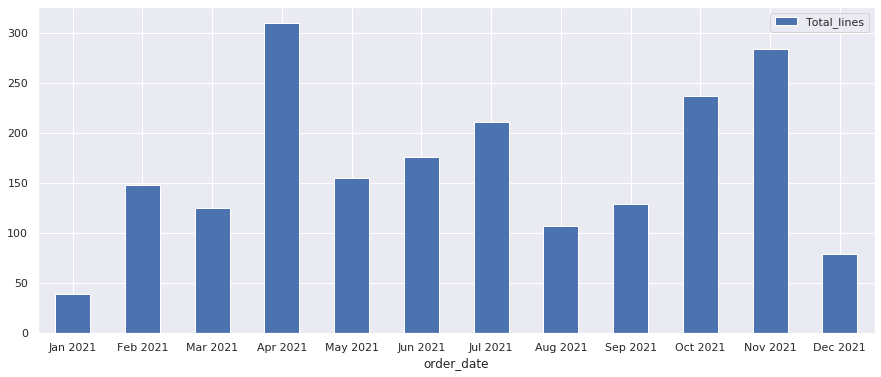

In [10]:
%piper gx <- orders >> group_by('order_date') >> summarise(Total_lines=('order_no', 'nunique'))

gx = gx.resample('M').sum()
gx.index = gx.index.strftime('%b %Y')
gx.plot(kind='bar', rot=0, figsize=(15, 6));

## customer/orders (merged data)

In [11]:
%piper customer_orders <- orders >> inner_join(customers)
head(customer_orders, 3)

3982 rows, 24 columns


,order_no,order_type,company,order_line,order_date,shipping_date,delivery_date,customer_no,product_code,description,order_quantity,unit_price,discount_%,salutation,first_name,type,initial,surname,email,dob,status,street,area,pcode
0,200000,ST,8500,1,2021-05-25,2021-05-27,2021-05-29,49529335,830-6901,CLEOCIN,14,14.7793,0.0,Ms,Jeanette,HomeCare,,Paul,j.paul@gmx.com,1949-06-20,0,14c Hillview Place,Bristol,BS16 6BZ
1,200000,ST,8500,2,2021-05-25,2021-05-27,2021-05-29,49529335,CZE-11987,CLEOCIN PHOSPHATE,18,1.9874,0.2,Ms,Jeanette,HomeCare,,Paul,j.paul@gmx.com,1949-06-20,0,14c Hillview Place,Bristol,BS16 6BZ
2,200000,ST,8500,3,2021-05-25,2021-05-27,2021-05-29,49529335,SAG-6045,BRYHALI LOTION,14,12.7523,0.0,Ms,Jeanette,HomeCare,,Paul,j.paul@gmx.com,1949-06-20,0,14c Hillview Place,Bristol,BS16 6BZ


## customer_orders - set data items to fix (demo)

In [12]:
columns(customer_orders, astype='text')

"['order_no', 'order_type', 'company', 'order_line', 'order_date', 'shipping_date', 'delivery_date', 'customer_no', 'product_code', 'description', 'order_quantity', 'unit_price', 'discount_%', 'salutation', 'first_name', 'type', 'initial', 'surname', 'email', 'dob', 'status', 'street', 'area', 'pcode']"

In [13]:
orders_tofix = customer_orders.copy(deep=True)

# Convert dates to JDE Julian format
# Note: Convert from Julian to Gregorian in Excel::
# =DATE(INT(E2/1000)+1900,MONTH(+E2-INT(E2/1000)*1000),DAY(+E2-INT(E2/1000)*1000))
cols = ['order_date', 'shipping_date', 'delivery_date']
for col in cols:
    orders_tofix[col] = orders_tofix[col].apply(to_julian)

# Remove customer data details
orders_tofix = orders_tofix.loc[:, 'order_no':'discount_%']

# Add in annoying blanks into product and customer codes (VLOOKUP challenge)
orders_tofix.customer_no = '    ' + orders_tofix.customer_no.astype(str) + '     '
orders_tofix.product_code = '      ' + orders_tofix.product_code + '     '

# Sort data
orders_tofix = orders_tofix.sort_values(['order_no', 'order_line'])

# Check first few rows
head(orders_tofix, 5)

3982 rows, 13 columns


,order_no,order_type,company,order_line,order_date,shipping_date,delivery_date,customer_no,product_code,description,order_quantity,unit_price,discount_%
0,200000,ST,8500,1,121145,121147,121149,49529335,830-6901,CLEOCIN,14,14.7793,0.0
1,200000,ST,8500,2,121145,121147,121149,49529335,CZE-11987,CLEOCIN PHOSPHATE,18,1.9874,0.2
2,200000,ST,8500,3,121145,121147,121149,49529335,SAG-6045,BRYHALI LOTION,14,12.7523,0.0
6,200001,SK,8500,1,121330,121333,121336,49529368,GXN-7894,ZIEXTENZO,39,16.9829,0.0
14,200002,SO,8500,1,121110,121113,121116,49529430,32S-17329,SANCUSO,26,6.8108,0.1


# Export

## (xl) customers, skus and order data

In [14]:
xlfile = f'outputs/{year} customers, products, orders'
wb = WorkBook(xlfile, ts_prefix=False)
ws = wb.add_sheet(customers, sheet_name='customers')
ws = wb.add_sheet(skus, sheet_name='products')
ws = wb.add_sheet(orders, sheet_name='orders')   
wb.close()

Workbook: outputs/2021 customers, products, orders.xlsx
<< sheet mode >>
Sheet (range): customers ($A$1:$L$301)
Sheet (range): products ($A$1:$G$1212)
Sheet (range): orders ($A$1:$M$3983)
Completed.


## (xl) orders (to fix), customers, skus, order types

In [15]:
xlfile = f'outputs/{year} sales orders data clean'
wb = WorkBook(xlfile, ts_prefix=False)
ws = wb.add_sheet(orders_tofix, sheet_name='Sales orders')
ws = wb.add_sheet(customers, sheet_name='Customers')
ws = wb.add_sheet(skus, sheet_name='Products')
ws = wb.add_sheet(get_order_types(), sheet_name='Order Types') 
wb.close()

Workbook: outputs/2021 sales orders data clean.xlsx
<< sheet mode >>
Sheet (range): Sales orders ($A$1:$M$3983)
Sheet (range): Customers ($A$1:$L$301)
Sheet (range): Products ($A$1:$G$1212)
Sheet (range): Order Types ($A$1:$B$8)
Completed.


## (xl) orders: Split data by order type

In [16]:
%%piper 

df_order_types <- customer_orders
>> count('order_type')
>> inner_join(get_order_types(), left_on='order_type', right_on='type_')
>> rename(columns={'type_': 'order_type'})

In [17]:
df_order_types

,n,%,cum %,order_type,description
0,1396,35.06,35.06,SO,Sales Order
1,639,16.05,51.10,SK,Sales Intercompany Order
2,469,11.78,62.88,SQ,Quote Order
3,452,11.35,74.23,SI,Interbranch Sales Order
4,425,10.67,84.91,ST,Transfer Sales Order
5,400,10.05,94.95,SB,Blanket Order
6,201,5.05,100.00,SD,Direct Ship Order


### (xl) orders: multiple WorkBooks -> one workbook per order type

In [18]:
list(df_order_types.itertuples())

[Pandas(Index=0, n=1396, _2=35.06, _3=35.06, order_type='SO', description='Sales Order'),
 Pandas(Index=1, n=639, _2=16.05, _3=51.1, order_type='SK', description='Sales Intercompany Order'),
 Pandas(Index=2, n=469, _2=11.78, _3=62.88, order_type='SQ', description='Quote Order'),
 Pandas(Index=3, n=452, _2=11.35, _3=74.23, order_type='SI', description='Interbranch Sales Order'),
 Pandas(Index=4, n=425, _2=10.67, _3=84.91, order_type='ST', description='Transfer Sales Order'),
 Pandas(Index=5, n=400, _2=10.05, _3=94.95, order_type='SB', description='Blanket Order'),
 Pandas(Index=6, n=201, _2=5.05, _3=100.0, order_type='SD', description='Direct Ship Order')]

In [19]:
for row in df_order_types.itertuples():
    xl_file = f'outputs/xl/order types/{year} sales orders type - {row.order_type} {row.description}'
    df = customer_orders.query(f"order_type == '{row.order_type}'")
    WorkBook(xl_file, sheets={row.order_type: df}, ts_prefix=False)

Workbook: outputs/xl/order types/2021 sales orders type - SO Sales Order.xlsx
<< mult-sheet mode >>
Sheet (range): SO ($A$1:$X$1397)
Completed.


Workbook: outputs/xl/order types/2021 sales orders type - SK Sales Intercompany Order.xlsx
<< mult-sheet mode >>
Sheet (range): SK ($A$1:$X$640)
Completed.


Workbook: outputs/xl/order types/2021 sales orders type - SQ Quote Order.xlsx
<< mult-sheet mode >>
Sheet (range): SQ ($A$1:$X$470)
Completed.


Workbook: outputs/xl/order types/2021 sales orders type - SI Interbranch Sales Order.xlsx
<< mult-sheet mode >>
Sheet (range): SI ($A$1:$X$453)
Completed.


Workbook: outputs/xl/order types/2021 sales orders type - ST Transfer Sales Order.xlsx
<< mult-sheet mode >>
Sheet (range): ST ($A$1:$X$426)
Completed.


Workbook: outputs/xl/order types/2021 sales orders type - SB Blanket Order.xlsx
<< mult-sheet mode >>
Sheet (range): SB ($A$1:$X$401)
Completed.


Workbook: outputs/xl/order types/2021 sales orders type - SD Direct Ship Order.xlsx
<< mult-sheet mode >>
Sheet (range): SD ($A$1:$X$202)
Completed.


### (xl) orders: Workbook with multiple sheets -> one sheet per order type

In [20]:
dataset = {r.order_type: customer_orders.query(f"order_type == '{r.order_type}'") for r in df_order_types.itertuples()}

xl_file = f'outputs/{year} sales orders by order type'
WorkBook(xl_file, sheets=dataset, ts_prefix=False);

Workbook: outputs/2021 sales orders by order type.xlsx
<< mult-sheet mode >>
Sheet (range): SO ($A$1:$X$1397)
Sheet (range): SK ($A$1:$X$640)
Sheet (range): SQ ($A$1:$X$470)
Sheet (range): SI ($A$1:$X$453)
Sheet (range): ST ($A$1:$X$426)
Sheet (range): SB ($A$1:$X$401)
Sheet (range): SD ($A$1:$X$202)
Completed.


## (xl) orders: Split data by town

In [21]:
gx = (customer_orders.groupby(['area']).agg(total_orders=('order_no', 'nunique'),
                                            total_order_lines=('order_no', 'count'))
                                       .sort_values('total_orders', ascending=False))
head(gx)

97 rows, 2 columns


,total_orders,total_order_lines
area,,
Nottingham,71,144
Exeter,58,118
Glasgow,57,115
Llandudno,46,97


### Split customer orders by town into separate dataframes

In [22]:
list_of_cities = gx.index.values.tolist()
list_of_cities.sort()
', '.join(list_of_cities)

'Aberdeen, Bath, Birmingham, Blackburn, Blackpool, Bolton, Bournemouth, Bradford, Brighton, Bristol, Bromley, Cambridge, Cardiff, Carlisle, Chelmsford, Chester, Cleveland, Coventry, Croydon, Darlington, Derby, Doncaster, Dorchester, Dudley, Dumfries and Galloway, East London, Edinburgh, Enfield, Exeter, Galashiels, Glasgow, Gloucester, Guildford, Halifax, Harrow, Hemel Hempstead, Hereford, Huddersfield, Hull, Inverness, Ipswich, Kilmarnock, Kingston upon Thames, Kirkcaldy, Lancaster, Leeds, Leicester, Lincoln, Liverpool, Llandrindod Wells, Llandudno, Manchester, Milton Keynes, Newcastle upon Tyne, Newport, North West London, Northampton, Norwich, Nottingham, Oldham, Oxford, Paisley, Peterborough, Plymouth, Portsmouth, Preston, Reading, Redhill, Rochester, Salisbury, Sheffield, Shrewsbury, Slough, South East London, South West London, Southall, Southampton, Southend-on-Sea, St Albans, Stevenage, Stockport, Sunderland, Sutton, Swansea, Taunton, Telford, Tonbridge, Torquay, Truro, Twicken

### (xl) orders: Workbook with multiple sheets -> one sheet per town

In [23]:
# Using a dictionary where key = town and value is the filtered town data
# one can take advantage of pipers WorkBook object, which can 
# accept a dictionary of sheet names and dataframes to generate worksheets
dataset = {city: customer_orders.query(f"area == '{city}'") for city in list_of_cities}

xl_file = f'outputs/{year} sales orders by town'
WorkBook(xl_file, sheets=dataset, ts_prefix=False);

Workbook: outputs/2021 sales orders by town.xlsx
<< mult-sheet mode >>
Sheet (range): Aberdeen ($A$1:$X$90)
Sheet (range): Bath ($A$1:$X$27)
Sheet (range): Birmingham ($A$1:$X$73)
Sheet (range): Blackburn ($A$1:$X$17)
Sheet (range): Blackpool ($A$1:$X$81)
Sheet (range): Bolton ($A$1:$X$41)
Sheet (range): Bournemouth ($A$1:$X$46)
Sheet (range): Bradford ($A$1:$X$27)
Sheet (range): Brighton ($A$1:$X$83)
Sheet (range): Bristol ($A$1:$X$80)
Sheet (range): Bromley ($A$1:$X$10)
Sheet (range): Cambridge ($A$1:$X$17)
Sheet (range): Cardiff ($A$1:$X$76)
Sheet (range): Carlisle ($A$1:$X$49)
Sheet (range): Chelmsford ($A$1:$X$15)
Sheet (range): Chester ($A$1:$X$69)
Sheet (range): Cleveland ($A$1:$X$8)
Sheet (range): Coventry ($A$1:$X$33)
Sheet (range): Croydon ($A$1:$X$28)
Sheet (range): Darlington ($A$1:$X$28)
Sheet (range): Derby ($A$1:$X$18)
Sheet (range): Doncaster ($A$1:$X$47)
Sheet (range): Dorchester ($A$1:$X$40)
Sheet (range): Dudley ($A$1:$X$49)
Sheet (range): Dumfries and Galloway ($A$1

### (xl) orders: multiple WorkBooks -> one workbook per town

In [24]:
for town, df in dataset.items():
    xl_file = f'outputs/xl/town_data/{year} sales orders - {town}'
#     logger.info(xl_file)
#     print({town: df.shape})
    WorkBook(xl_file, sheets={town: df}, ts_prefix=False)

Workbook: outputs/xl/town_data/2021 sales orders - Aberdeen.xlsx
<< mult-sheet mode >>
Sheet (range): Aberdeen ($A$1:$X$90)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Bath.xlsx
<< mult-sheet mode >>
Sheet (range): Bath ($A$1:$X$27)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Birmingham.xlsx
<< mult-sheet mode >>
Sheet (range): Birmingham ($A$1:$X$73)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Blackburn.xlsx
<< mult-sheet mode >>
Sheet (range): Blackburn ($A$1:$X$17)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Blackpool.xlsx
<< mult-sheet mode >>
Sheet (range): Blackpool ($A$1:$X$81)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Bolton.xlsx
<< mult-sheet mode >>
Sheet (range): Bolton ($A$1:$X$41)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Bournemouth.xlsx
<< mult-sheet mode >>
Sheet (range): Bournemouth ($A$1:$X$46)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Bradford.xlsx
<< mult-sheet mode >>
Sheet (range): Bradford ($A$1:$X$27)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Brighton.xlsx
<< mult-sheet mode >>
Sheet (range): Brighton ($A$1:$X$83)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Bristol.xlsx
<< mult-sheet mode >>
Sheet (range): Bristol ($A$1:$X$80)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Bromley.xlsx
<< mult-sheet mode >>
Sheet (range): Bromley ($A$1:$X$10)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Cambridge.xlsx
<< mult-sheet mode >>
Sheet (range): Cambridge ($A$1:$X$17)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Cardiff.xlsx
<< mult-sheet mode >>
Sheet (range): Cardiff ($A$1:$X$76)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Carlisle.xlsx
<< mult-sheet mode >>
Sheet (range): Carlisle ($A$1:$X$49)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Chelmsford.xlsx
<< mult-sheet mode >>
Sheet (range): Chelmsford ($A$1:$X$15)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Chester.xlsx
<< mult-sheet mode >>
Sheet (range): Chester ($A$1:$X$69)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Cleveland.xlsx
<< mult-sheet mode >>
Sheet (range): Cleveland ($A$1:$X$8)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Coventry.xlsx
<< mult-sheet mode >>
Sheet (range): Coventry ($A$1:$X$33)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Croydon.xlsx
<< mult-sheet mode >>
Sheet (range): Croydon ($A$1:$X$28)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Darlington.xlsx
<< mult-sheet mode >>
Sheet (range): Darlington ($A$1:$X$28)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Derby.xlsx
<< mult-sheet mode >>
Sheet (range): Derby ($A$1:$X$18)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Doncaster.xlsx
<< mult-sheet mode >>
Sheet (range): Doncaster ($A$1:$X$47)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Dorchester.xlsx
<< mult-sheet mode >>
Sheet (range): Dorchester ($A$1:$X$40)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Dudley.xlsx
<< mult-sheet mode >>
Sheet (range): Dudley ($A$1:$X$49)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Dumfries and Galloway.xlsx
<< mult-sheet mode >>
Sheet (range): Dumfries and Galloway ($A$1:$X$18)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - East London.xlsx
<< mult-sheet mode >>
Sheet (range): East London ($A$1:$X$13)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Edinburgh.xlsx
<< mult-sheet mode >>
Sheet (range): Edinburgh ($A$1:$X$79)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Enfield.xlsx
<< mult-sheet mode >>
Sheet (range): Enfield ($A$1:$X$38)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Exeter.xlsx
<< mult-sheet mode >>
Sheet (range): Exeter ($A$1:$X$119)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Galashiels.xlsx
<< mult-sheet mode >>
Sheet (range): Galashiels ($A$1:$X$27)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Glasgow.xlsx
<< mult-sheet mode >>
Sheet (range): Glasgow ($A$1:$X$116)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Gloucester.xlsx
<< mult-sheet mode >>
Sheet (range): Gloucester ($A$1:$X$81)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Guildford.xlsx
<< mult-sheet mode >>
Sheet (range): Guildford ($A$1:$X$30)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Halifax.xlsx
<< mult-sheet mode >>
Sheet (range): Halifax ($A$1:$X$20)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Harrow.xlsx
<< mult-sheet mode >>
Sheet (range): Harrow ($A$1:$X$15)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Hemel Hempstead.xlsx
<< mult-sheet mode >>
Sheet (range): Hemel Hempstead ($A$1:$X$65)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Hereford.xlsx
<< mult-sheet mode >>
Sheet (range): Hereford ($A$1:$X$17)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Huddersfield.xlsx
<< mult-sheet mode >>
Sheet (range): Huddersfield ($A$1:$X$14)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Hull.xlsx
<< mult-sheet mode >>
Sheet (range): Hull ($A$1:$X$17)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Inverness.xlsx
<< mult-sheet mode >>
Sheet (range): Inverness ($A$1:$X$50)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Ipswich.xlsx
<< mult-sheet mode >>
Sheet (range): Ipswich ($A$1:$X$78)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Kilmarnock.xlsx
<< mult-sheet mode >>
Sheet (range): Kilmarnock ($A$1:$X$12)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Kingston upon Thames.xlsx
<< mult-sheet mode >>
Sheet (range): Kingston upon Thames ($A$1:$X$29)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Kirkcaldy.xlsx
<< mult-sheet mode >>
Sheet (range): Kirkcaldy ($A$1:$X$18)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Lancaster.xlsx
<< mult-sheet mode >>
Sheet (range): Lancaster ($A$1:$X$73)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Leeds.xlsx
<< mult-sheet mode >>
Sheet (range): Leeds ($A$1:$X$43)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Leicester.xlsx
<< mult-sheet mode >>
Sheet (range): Leicester ($A$1:$X$43)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Lincoln.xlsx
<< mult-sheet mode >>
Sheet (range): Lincoln ($A$1:$X$28)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Liverpool.xlsx
<< mult-sheet mode >>
Sheet (range): Liverpool ($A$1:$X$27)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Llandrindod Wells.xlsx
<< mult-sheet mode >>
Sheet (range): Llandrindod Wells ($A$1:$X$21)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Llandudno.xlsx
<< mult-sheet mode >>
Sheet (range): Llandudno ($A$1:$X$98)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Manchester.xlsx
<< mult-sheet mode >>
Sheet (range): Manchester ($A$1:$X$71)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Milton Keynes.xlsx
<< mult-sheet mode >>
Sheet (range): Milton Keynes ($A$1:$X$52)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Newcastle upon Tyne.xlsx
<< mult-sheet mode >>
Sheet (range): Newcastle upon Tyne ($A$1:$X$39)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Newport.xlsx
<< mult-sheet mode >>
Sheet (range): Newport ($A$1:$X$23)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - North West London.xlsx
<< mult-sheet mode >>
Sheet (range): North West London ($A$1:$X$30)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Northampton.xlsx
<< mult-sheet mode >>
Sheet (range): Northampton ($A$1:$X$40)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Norwich.xlsx
<< mult-sheet mode >>
Sheet (range): Norwich ($A$1:$X$64)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Nottingham.xlsx
<< mult-sheet mode >>
Sheet (range): Nottingham ($A$1:$X$145)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Oldham.xlsx
<< mult-sheet mode >>
Sheet (range): Oldham ($A$1:$X$66)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Oxford.xlsx
<< mult-sheet mode >>
Sheet (range): Oxford ($A$1:$X$27)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Paisley.xlsx
<< mult-sheet mode >>
Sheet (range): Paisley ($A$1:$X$26)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Peterborough.xlsx
<< mult-sheet mode >>
Sheet (range): Peterborough ($A$1:$X$75)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Plymouth.xlsx
<< mult-sheet mode >>
Sheet (range): Plymouth ($A$1:$X$86)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Portsmouth.xlsx
<< mult-sheet mode >>
Sheet (range): Portsmouth ($A$1:$X$34)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Preston.xlsx
<< mult-sheet mode >>
Sheet (range): Preston ($A$1:$X$45)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Reading.xlsx
<< mult-sheet mode >>
Sheet (range): Reading ($A$1:$X$42)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Redhill.xlsx
<< mult-sheet mode >>
Sheet (range): Redhill ($A$1:$X$56)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Rochester.xlsx
<< mult-sheet mode >>
Sheet (range): Rochester ($A$1:$X$30)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Salisbury.xlsx
<< mult-sheet mode >>
Sheet (range): Salisbury ($A$1:$X$38)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Sheffield.xlsx
<< mult-sheet mode >>
Sheet (range): Sheffield ($A$1:$X$67)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Shrewsbury.xlsx
<< mult-sheet mode >>
Sheet (range): Shrewsbury ($A$1:$X$68)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Slough.xlsx
<< mult-sheet mode >>
Sheet (range): Slough ($A$1:$X$32)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - South East London.xlsx
<< mult-sheet mode >>
Sheet (range): South East London ($A$1:$X$46)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - South West London.xlsx
<< mult-sheet mode >>
Sheet (range): South West London ($A$1:$X$34)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Southall.xlsx
<< mult-sheet mode >>
Sheet (range): Southall ($A$1:$X$30)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Southampton.xlsx
<< mult-sheet mode >>
Sheet (range): Southampton ($A$1:$X$24)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Southend-on-Sea.xlsx
<< mult-sheet mode >>
Sheet (range): Southend-on-Sea ($A$1:$X$14)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - St Albans.xlsx
<< mult-sheet mode >>
Sheet (range): St Albans ($A$1:$X$7)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Stevenage.xlsx
<< mult-sheet mode >>
Sheet (range): Stevenage ($A$1:$X$49)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Stockport.xlsx
<< mult-sheet mode >>
Sheet (range): Stockport ($A$1:$X$62)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Sunderland.xlsx
<< mult-sheet mode >>
Sheet (range): Sunderland ($A$1:$X$15)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Sutton.xlsx
<< mult-sheet mode >>
Sheet (range): Sutton ($A$1:$X$11)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Swansea.xlsx
<< mult-sheet mode >>
Sheet (range): Swansea ($A$1:$X$37)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Taunton.xlsx
<< mult-sheet mode >>
Sheet (range): Taunton ($A$1:$X$19)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Telford.xlsx
<< mult-sheet mode >>
Sheet (range): Telford ($A$1:$X$10)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Tonbridge.xlsx
<< mult-sheet mode >>
Sheet (range): Tonbridge ($A$1:$X$21)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Torquay.xlsx
<< mult-sheet mode >>
Sheet (range): Torquay ($A$1:$X$6)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Truro.xlsx
<< mult-sheet mode >>
Sheet (range): Truro ($A$1:$X$42)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Twickenham.xlsx
<< mult-sheet mode >>
Sheet (range): Twickenham ($A$1:$X$20)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Wakefield.xlsx
<< mult-sheet mode >>
Sheet (range): Wakefield ($A$1:$X$38)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Walsall.xlsx
<< mult-sheet mode >>
Sheet (range): Walsall ($A$1:$X$28)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Warrington.xlsx
<< mult-sheet mode >>
Sheet (range): Warrington ($A$1:$X$29)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - West London.xlsx
<< mult-sheet mode >>
Sheet (range): West London ($A$1:$X$50)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Wigan.xlsx
<< mult-sheet mode >>
Sheet (range): Wigan ($A$1:$X$10)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - Worcester.xlsx
<< mult-sheet mode >>
Sheet (range): Worcester ($A$1:$X$31)
Completed.


Workbook: outputs/xl/town_data/2021 sales orders - York.xlsx
<< mult-sheet mode >>
Sheet (range): York ($A$1:$X$49)
Completed.


## (csv) -  customer_orders -> split_dataframe -> multiple csvs

In [25]:
head(orders_tofix, 2)

3982 rows, 13 columns


,order_no,order_type,company,order_line,order_date,shipping_date,delivery_date,customer_no,product_code,description,order_quantity,unit_price,discount_%
0,200000,ST,8500,1,121145,121147,121149,49529335,830-6901,CLEOCIN,14,14.7793,0.0
1,200000,ST,8500,2,121145,121147,121149,49529335,CZE-11987,CLEOCIN PHOSPHATE,18,1.9874,0.2


Split orders into 'chunks' - a list of dataframes

In [26]:
chunk_size=1000
chunks = split_dataframe(orders_tofix.sort_index(), chunk_size=chunk_size)

for idx, df in enumerate(chunks):
    f = f'outputs/csv/orders_{str(idx).zfill(2)}.csv'
    
    df.to_csv(f, index=False, sep='\t', chunksize=chunk_size)
    logger.info(f'{f}, {df.shape}')

outputs/csv/orders_00.csv, (1000, 13)
outputs/csv/orders_01.csv, (1000, 13)
outputs/csv/orders_02.csv, (1000, 13)
outputs/csv/orders_03.csv, (982, 13)


# Import

## Consolidate multiple CSV's to ONE dataframe

In [27]:
dx = read_csvs('outputs/csv', sep='\t')
head(dx, 2)

3982 rows, 13 columns
3982 rows, 13 columns


,order_no,order_type,company,order_line,order_date,shipping_date,delivery_date,customer_no,product_code,description,order_quantity,unit_price,discount_%
0,200654,SO,8500,3,121293,121296,121298,49529480,XLU-11682,ALFAMINO JUNIOR,15,15.6340,0.6
1,200816,SK,8500,1,121018,121020,121021,49529480,QY4-456,VERZENIO,35,9.4695,0.0


## Read xl - data in multiple sheets -> read_excel_sheets

In [28]:
xl_file = f'outputs/{year} sales orders by town.xlsx'
dx = read_excel_sheets(xl_file, include_sheet=True)
dx = dx.reset_index()

In [29]:
tail(dx, 2)

3982 rows, 26 columns


,index,order_no,order_type,company,order_line,order_date,shipping_date,delivery_date,customer_no,product_code,description,order_quantity,unit_price,discount_%,salutation,first_name,type,initial,surname,email,dob,status,street,area,pcode,sheet_name
3980,46,201982,SO,8500,2,2021-03-06,2021-03-07,2021-03-08,49529422,6A1-15235,ESTRACE CREAM,30,5.8846,0.0,Ms,Lucille,Hospital patient,,Prince,lucilleprince@icloud.com,1996-07-29,1,34 Birdcage Terrace,York,YO7 1GZ,York
3981,47,201982,SO,8500,3,2021-03-06,2021-03-07,2021-03-08,49529422,RSX-3603,ALIQOPA,22,19.1697,0.6,Ms,Lucille,Hospital patient,,Prince,lucilleprince@icloud.com,1996-07-29,1,34 Birdcage Terrace,York,YO7 1GZ,York


### Combine multi-sheet town data into ONE xl file

In [30]:
wb = WorkBook(f'outputs/{year} sales orders combined town data', ts_prefix=False)
ws = wb.add_sheet(dx)   
wb.close()

Workbook: outputs/2021 sales orders combined town data.xlsx
<< sheet mode >>
Sheet (range): sheet1 ($A$1:$Z$3983)
Completed.
